<a href="https://colab.research.google.com/github/abner-lucas/preprocessing_EEG_with_MNE/blob/master/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pre-processing EEG data with MNE-Python
Datagenerated in BrainVision Recorder software (.vhdr, .eeg, .vmrk)

#### Packets and connections

In [1]:
#!git clone https://github.com/abner-lucas/preprocessing_EEG_with_MNE.git

In [2]:
#Install package
#!pip install mne
#!pip install autoreject
#!pip install h5io

In [3]:
#Connect to Google Drive to get raw data
#from google.colab import drive
#drive.mount('/content/drive/')

In [4]:
import mne
mne.set_log_level('error')

import glob
import pandas as pd
import matplotlib.pyplot as plt

#### Loading data

In [5]:
#Dataset path in my GDrive or in local
#path = f'MyDrive/Colab Notebooks/PPGCC/EEG/data_brainvision/'
path = f'data_brainvision/'
subject = 'Metzler0004'

#Checking existence of all files
glob.glob(path + subject + '*')

['data_brainvision\\Metzler0004.eeg',
 'data_brainvision\\Metzler0004.vhdr',
 'data_brainvision\\Metzler0004.vmrk']

In [6]:
#Subject 0004 files 
name_files = [subject + '.eeg', subject + '.vhdr', subject + '.vmrk']
files = [path + name for name in name_files]

#Reading EEG files
raw_data = mne.io.read_raw_brainvision(files[1], preload=True) #Preloading raw data into memory
raw_data

<RawBrainVision | Metzler0004.eeg, 64 x 1823140 (1823.1 s), ~890.3 MB, data loaded>

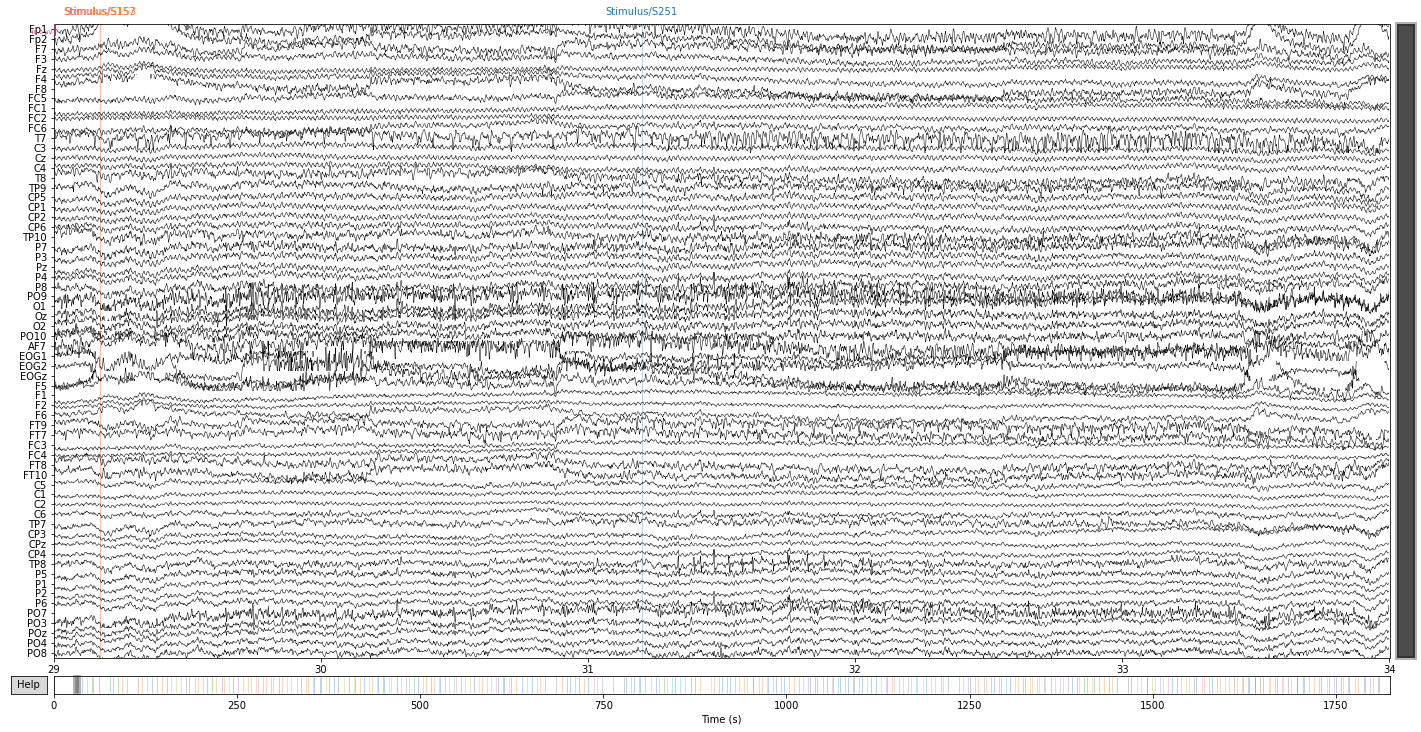

In [7]:
#Resizing plot figure
mne.set_config('MNE_BROWSE_RAW_SIZE','20,10')

#Plotting first 5s of raw data from all channels
fig1 = raw_data.plot(n_channels=64, start=29, duration=5, title='Signal raw data');

#save figure
fig1.savefig('outputs_fig/fig1_signal_raw_data.png', dpi=600)

#### Working with metadata

In [8]:
#Viewing keys in the raw data
raw_data.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [9]:
#Viewing dictionary of raw data
raw_data.__dict__

{'_last_samps': array([1823139]),
 '_first_samps': array([0]),
 'info': <Info | 7 non-empty values
  bads: []
  ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
  chs: 64 EEG
  custom_ref_applied: False
  highpass: 0.0 Hz
  lowpass: 250.0 Hz
  meas_date: 2015-10-02 15:10:43 UTC
  nchan: 64
  projs: []
  sfreq: 1000.0 Hz
 >,
 'buffer_size_sec': 1.0,
 '_cals': array([1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07,
        1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07, 1.e-07]),
 '_raw_extras': [{'offsets': None,


In [10]:
#Viewing channel names
print(raw_data.info['ch_names'])

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10', 'AF7', 'EOG1', 'EOG2', 'EOGz', 'F5', 'F1', 'F2', 'F6', 'FT9', 'FT7', 'FC3', 'FC4', 'FT8', 'FT10', 'C5', 'C1', 'C2', 'C6', 'TP7', 'CP3', 'CPz', 'CP4', 'TP8', 'P5', 'P1', 'P2', 'P6', 'PO7', 'PO3', 'POz', 'PO4', 'PO8']


In [11]:
#Setting the reference channel for eyes movement
raw_data.set_channel_types({'EOG1': 'eog', 'EOG2': 'eog', 'EOGz': 'eog'})

<RawBrainVision | Metzler0004.eeg, 64 x 1823140 (1823.1 s), ~890.3 MB, data loaded>

In [12]:
#Setting the 10-20 pattern in the channel position
raw_data.set_montage('standard_1020')
raw_data.info['dig']

[<DigPoint |        LPA : (-82.5, 0.0, 0.0) mm      : head frame>,
 <DigPoint |     Nasion : (-0.0, 114.0, 0.0) mm     : head frame>,
 <DigPoint |        RPA : (82.5, -0.0, -0.0) mm     : head frame>,
 <DigPoint |     EEG #1 : (-30.9, 114.6, 27.9) mm   : head frame>,
 <DigPoint |     EEG #3 : (28.4, 115.3, 27.7) mm    : head frame>,
 <DigPoint |     EEG #5 : (-56.4, 99.2, 25.1) mm    : head frame>,
 <DigPoint |    EEG #16 : (-71.9, 73.1, 25.8) mm    : head frame>,
 <DigPoint |    EEG #17 : (-66.1, 80.2, 53.8) mm    : head frame>,
 <DigPoint |    EEG #18 : (-51.8, 86.7, 78.7) mm    : head frame>,
 <DigPoint |    EEG #19 : (-29.0, 91.4, 96.6) mm    : head frame>,
 <DigPoint |    EEG #20 : (-1.2, 93.3, 102.6) mm    : head frame>,
 <DigPoint |    EEG #21 : (28.0, 91.9, 95.8) mm     : head frame>,
 <DigPoint |    EEG #22 : (50.3, 87.4, 77.3) mm     : head frame>,
 <DigPoint |    EEG #23 : (66.3, 81.5, 53.1) mm     : head frame>,
 <DigPoint |    EEG #24 : (71.4, 74.5, 25.1) mm     : head fra

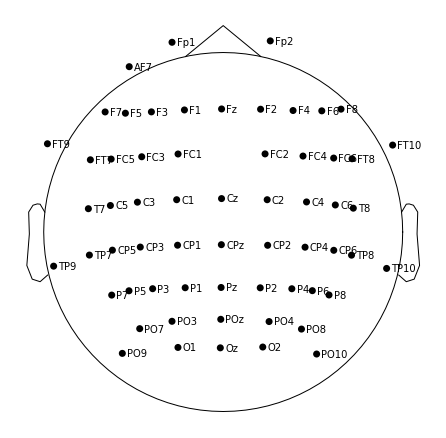

In [13]:
#Plotting the name and position of sensors
fig2 = raw_data.plot_sensors(show_names=True, title='Sensor positions - 10-20');

#save figure
fig2.savefig('outputs_fig/fig2_sensor_positions.png', dpi=600)

#### Filters

##### Resampling

In [14]:
#Downsampling (1000Hz to 250Hz)
print('Frequency before resampling: ', raw_data.info['sfreq'], 'Hz')

down_data = raw_data.copy().resample(250)

print('Frequency after resampling: ', down_data.info['sfreq'], 'Hz')

Frequency before resampling:  1000.0 Hz
Frequency after resampling:  250.0 Hz


##### Band-pass

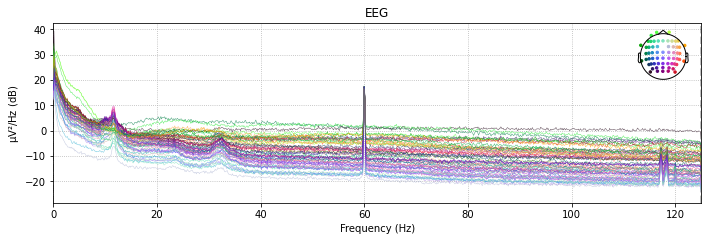

In [15]:
#Plotting the power spectral density
fig3 = down_data.plot_psd(fmax=125);

#Save figure
fig3.savefig('outputs_fig/fig3_power_density_250Hz.png', dpi=600)

In [16]:
#Band-pass filter (high-pass = 0.1Hz and low-pass = 35Hz)
f_data = down_data.copy().filter(l_freq=0.1, h_freq=35)

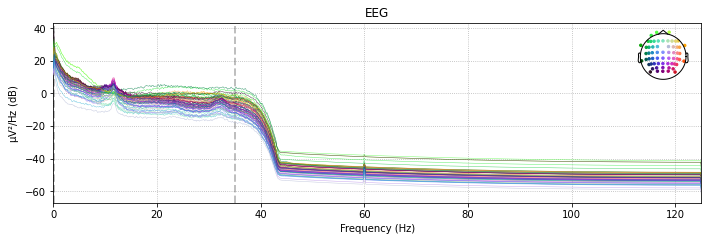

In [17]:
#Plotting the power spectral density
fig4 = f_data.plot_psd(fmax=125);

#Save figure
fig4.savefig('outputs_fig/fig4_power_density_35Hz.png', dpi=600)

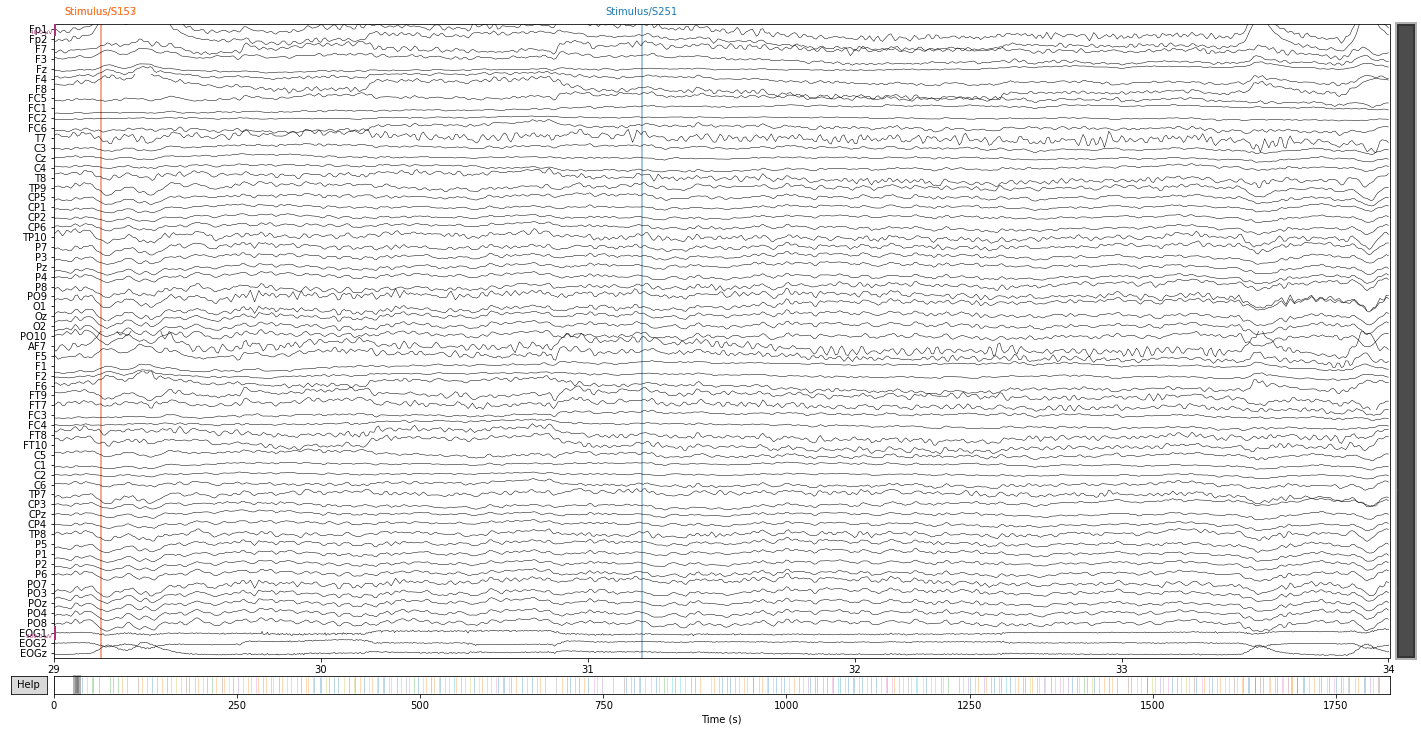

In [18]:
#Plotting filtered data
fig5 = f_data.plot(n_channels=64, start=29, duration=5, title='Filtered signal data');

#Save figure
fig5.savefig('outputs_fig/fig5_filtered_signal_data.png', dpi=600)

##### Stimulus

In [19]:
#Get stimulus point and its descriptors
events_stimulus, event_stimulus_dict = mne.events_from_annotations(f_data)
events_stimulus

#Save events_stimulis with txt
for i in range(len(events_stimulus)):
    with open(f'datasets/{subject}_events_stimulus.txt', 'a') as f:
        f.write(str(events_stimulus[i]) + '\n')

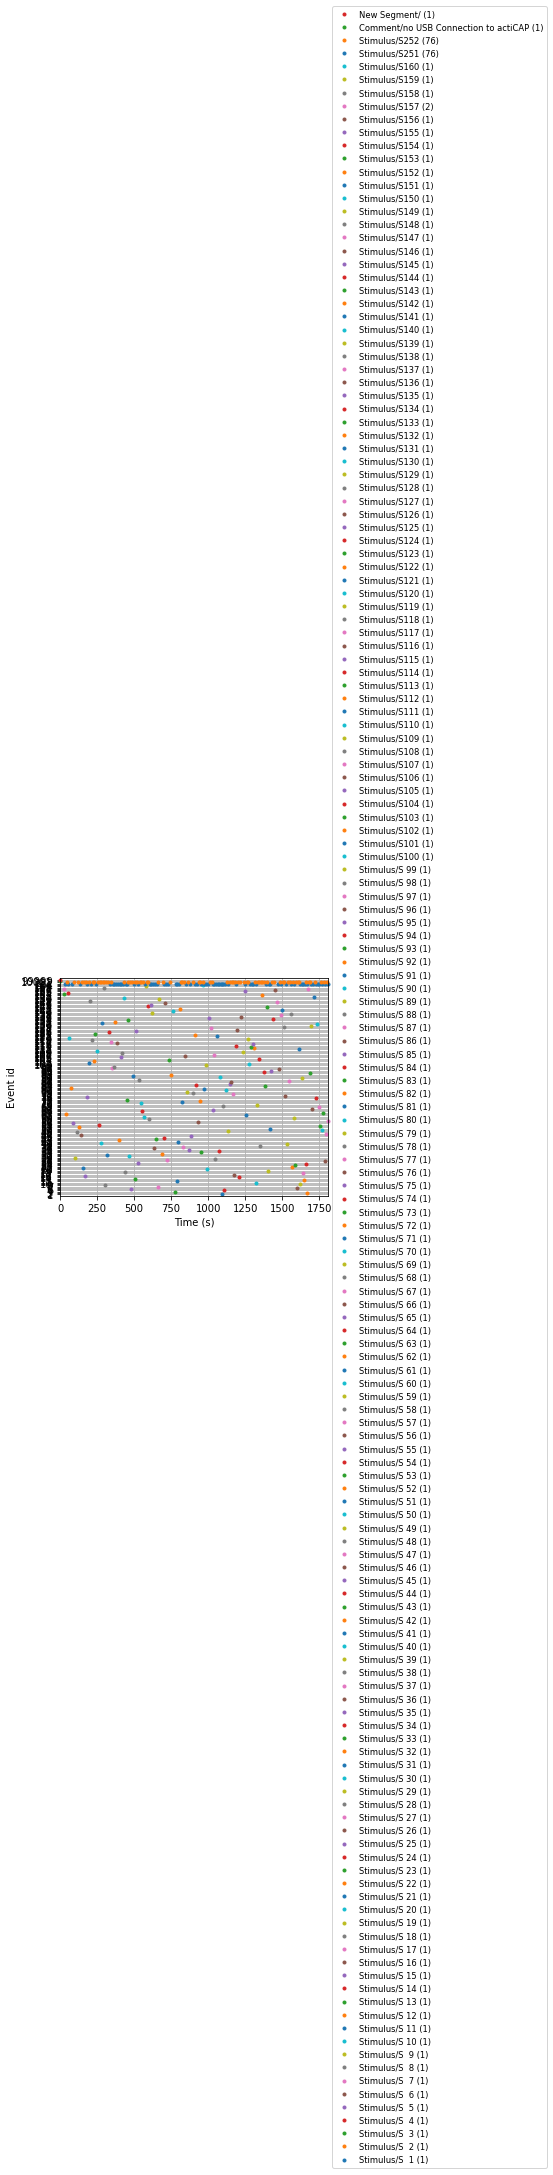

In [20]:
#Plotting events
fig6 = mne.viz.plot_events(events_stimulus, event_id=event_stimulus_dict, sfreq=f_data.info['sfreq']);

#save figure
fig6.savefig('outputs_fig/fig6_stimulus_point.png', dpi=600)

##### Trials

In [21]:
#Segmenting ERP signal:
# - 200 ms before stimulus and 4000 ms after
# - Baseline correction by subtracting the mean potential amplitude from the 200 ms interval immediately preceding the stimulus at each epoch
tinitial = -0.2
tfinal = 4.0

picks = mne.pick_types(f_data.info, eeg=True, eog=True, stim=True, meg=False, ecg=False, exclude='bads')
epochs = mne.Epochs(f_data.copy(), events_stimulus, event_id=event_stimulus_dict, picks=picks,
                    tmin=tinitial, tmax=tfinal, baseline=(None, 0), event_repeated='drop', preload=True)
epochs

<Epochs |  312 events (all good), -0.2 - 4 sec, baseline -0.2 – 0 sec, ~160.2 MB, data loaded,
 'New Segment/': 0
 'Stimulus/S  1': 1
 'Stimulus/S  2': 1
 'Stimulus/S  3': 1
 'Stimulus/S  4': 1
 'Stimulus/S  5': 1
 'Stimulus/S  6': 1
 'Stimulus/S  7': 1
 'Stimulus/S  8': 1
 'Stimulus/S  9': 1
 and 152 more events ...>

In [22]:
#Compute global rejection thresholds
from autoreject import get_rejection_threshold

bias_reject = get_rejection_threshold(epochs)
bias_reject

Estimating rejection dictionary for eeg
Estimating rejection dictionary for eog


{'eeg': 0.00037411234912027133, 'eog': 0.0016937069982713492}

In [23]:
#Delete epochs with high bias
#epochs.drop_bad(reject=bias_reject, flat=None)

#WARNING: Removing epochs from the data will influence ERPs.

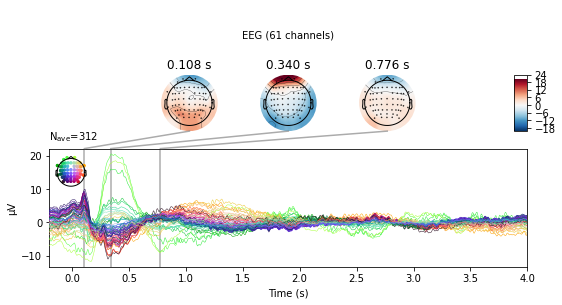

In [24]:
#Plotting the average of the epochs
fig7 = epochs.average().detrend().plot_joint();

#save figure
fig7.savefig('outputs_fig/fig7_average_epochs.png', dpi=600)

##### PREP pipeline

In [25]:
#Selecting and rebuilding bad electrodes with interpolation (PREP pipeline)
from autoreject import Ransac   # noqa

ransac = Ransac(verbose=True)
epochs_clean = ransac.fit_transform(epochs)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.2s finished


In [26]:
#Bad electrodes
print(ransac.bad_chs_)

#Marking bad electrodes
epochs_clean.info['bads'] = ransac.bad_chs_

['FC4']


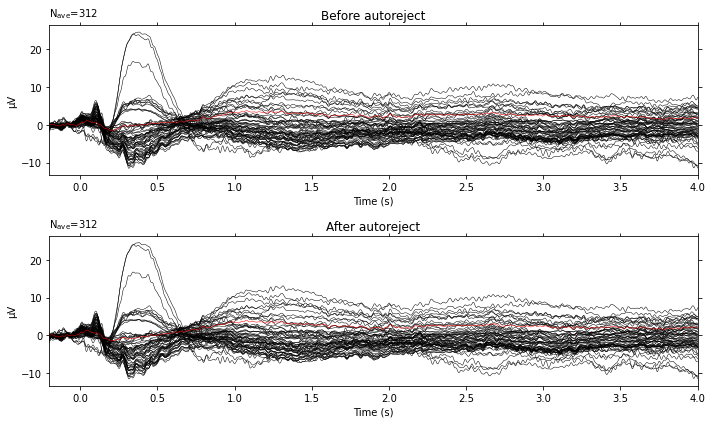

In [27]:
#Plotting the average of the epochs
evoked = epochs.average()
evoked_clean = epochs_clean.average()

#Marking bad electrodes on the evoked
evoked.info['bads'] = ransac.bad_chs_
evoked_clean.info['bads'] = ransac.bad_chs_

fig8, axes = plt.subplots(2, 1, figsize=(10, 6))

for ax in axes:
    ax.tick_params(axis='x', which='both', bottom='off', top='off')
    ax.tick_params(axis='y', which='both', left='off', right='off')

evoked.plot(exclude=[], axes=axes[0], show=False)
axes[0].set_title('Before autoreject')
evoked_clean.plot(exclude=[], axes=axes[1], show=False)
axes[1].set_title('After autoreject')
plt.tight_layout()

#save figure
fig8.savefig('outputs_fig/fig8_evoked_epochs_clean.png', dpi=600)

##### ICA

In [28]:
#Filter high-pass
f_epochs_clean = epochs_clean.copy().filter(l_freq=1, h_freq=None)

In [29]:
# ICA parameters
random_state = 42       # ensures ICA is reproducable each time it's run
ica_n_components = .99  # Specify n_components as a decimal to set % explained variance

#Compute ICA
ica = mne.preprocessing.ICA(n_components=ica_n_components, random_state=random_state)
ica.fit(f_epochs_clean, reject=bias_reject, tstep=tfinal)

<ICA | epochs decomposition, method: fastica (fit in 35 iterations on 327912 samples), 24 ICA components explaining 99.1 % of variance (60 PCA components available), channel types: eeg, no sources marked for exclusion>

In [30]:
#Detect EOG related components using correlation
eog_idx, eog_scores = ica.find_bads_eog(f_epochs_clean, ch_name=['EOG1', 'EOG2', 'EOGz'])
print(eog_idx)

[0, 1]


In [31]:
#Detect automatically ECG related components using correlation
#We don't have ECG reference channels

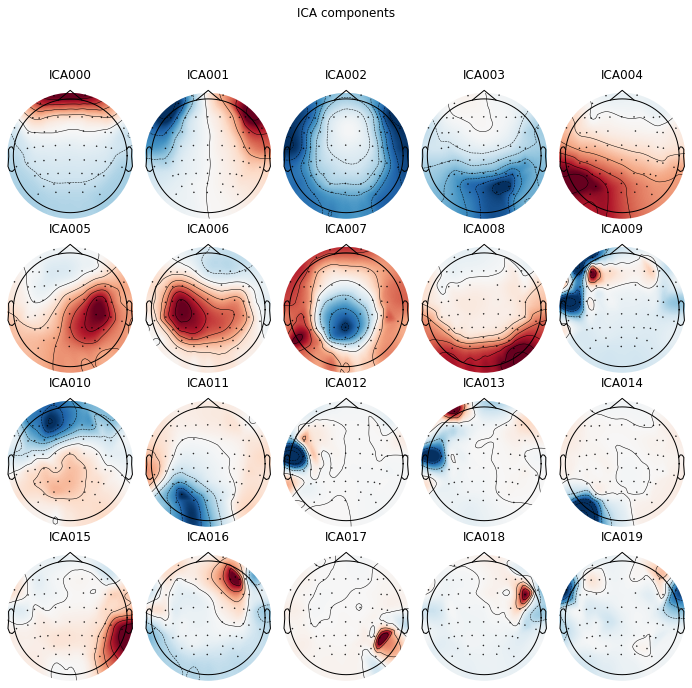

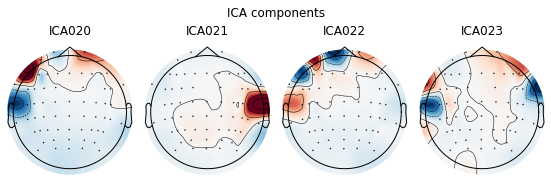

In [32]:
#Plot components
fig9 = ica.plot_components();

#save figures
for i, fig in enumerate(fig9):
    fig9[i].savefig(f'outputs_fig/fig9_ica_components_part{i+1}.png', dpi=600)

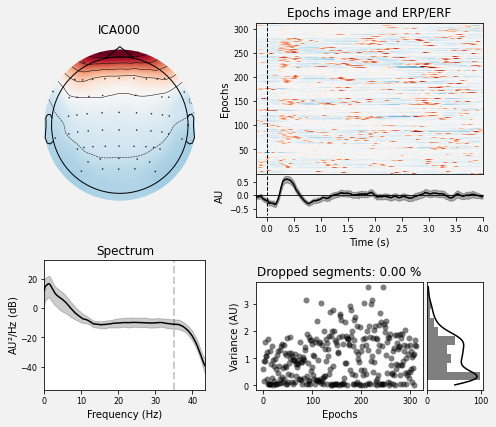

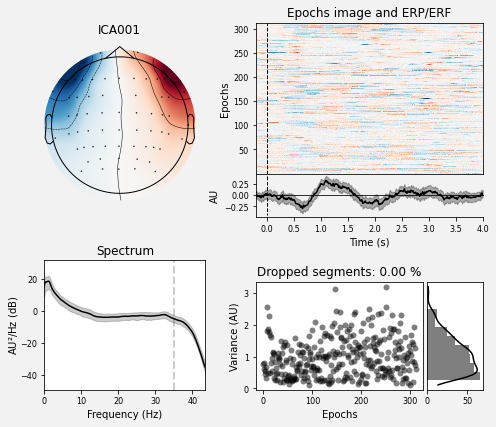

In [33]:
#Plot in the topography of the components in eog_idx
fig10 = ica.plot_properties(f_epochs_clean, eog_idx);

#save figure
for i, (component, fig) in enumerate(zip(eog_idx, fig10)):
    fig10[i].savefig(f'outputs_fig/fig10_removed_ica_{component}_properties.png', dpi=600)

In [34]:
#Exclude EOG-related components
ica.exclude = eog_idx

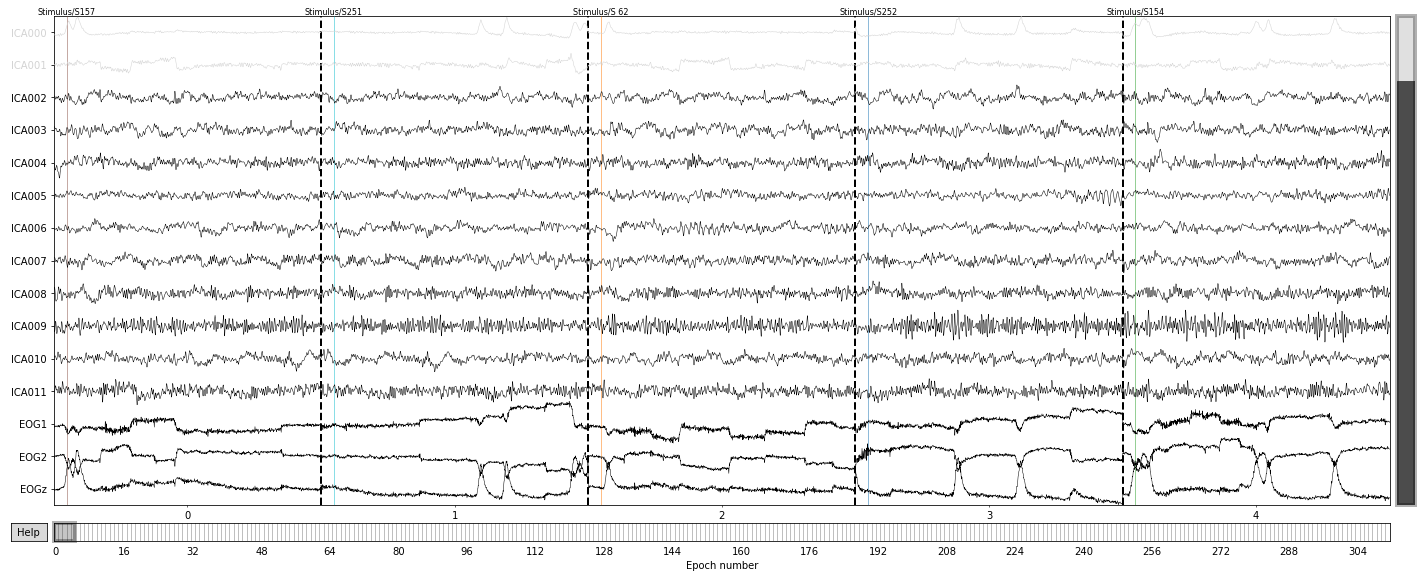

In [35]:
#Resizing plot figure
mne.set_config('MNE_BROWSE_RAW_SIZE','20,8')

#Plot the first components
fig11 = ica.plot_sources(f_epochs_clean, picks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], start=0, stop=5);

#save figure
fig11.savefig('outputs_fig/fig11_ica_sources_epochs_clean.png', dpi=600)

In [36]:
#Apply ICA to the data
f_epochs_clean_ica = ica.apply(f_epochs_clean.copy(), exclude=ica.exclude)

##### CAR

In [37]:
#Apply CAR (common average reference)
f_epochs_clean_ica_car = f_epochs_clean_ica.copy().set_eeg_reference('average', ch_type='eeg', projection=True)
f_epochs_clean_ica_car.apply_proj();

##### Comparation before/after the are ICA-CAR

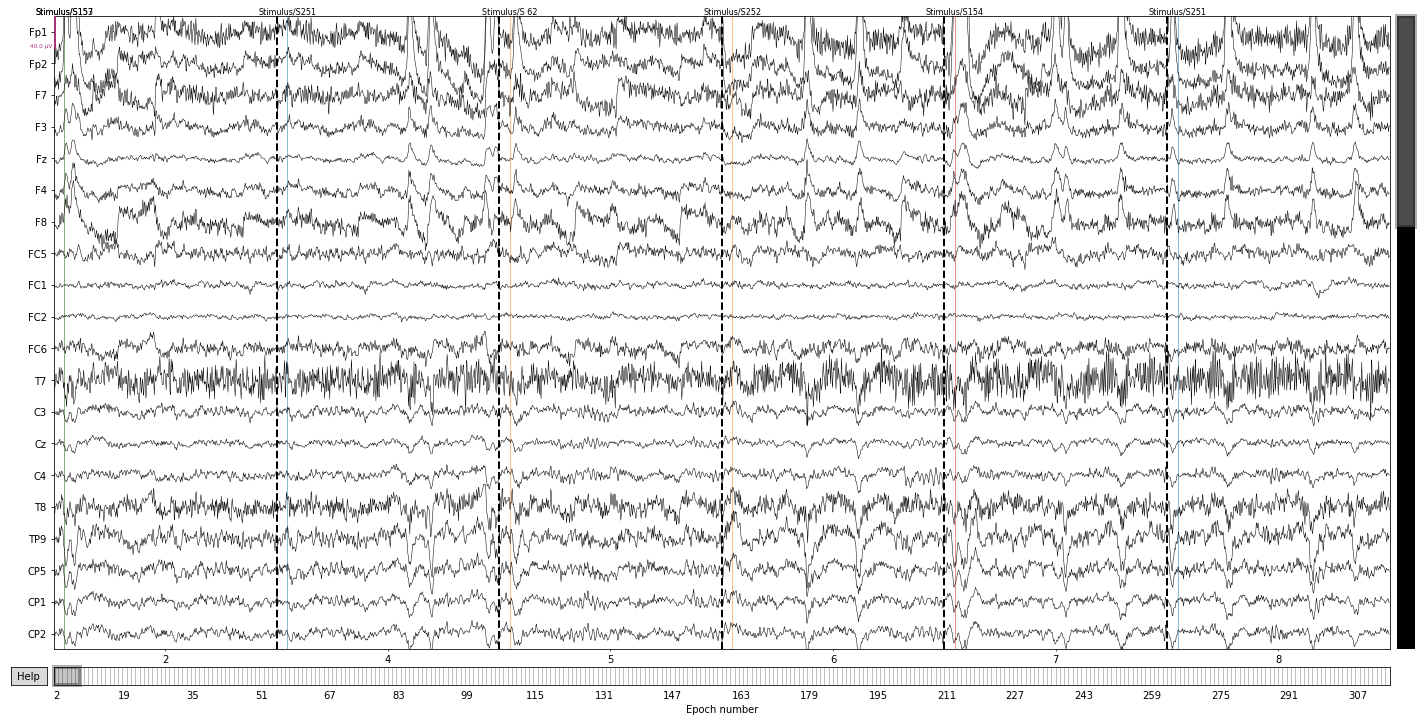

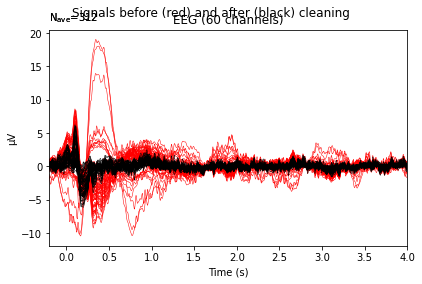

In [38]:
#Resizing plot figure
mne.set_config('MNE_BROWSE_RAW_SIZE','20,10')

#Filtered data before ICA-CAR
fig12 = f_epochs_clean.plot(n_epochs=6, events=events_stimulus, event_id=event_stimulus_dict);
fig13 = ica.plot_overlay(f_epochs_clean.average());

#save figures
fig12.savefig('outputs_fig/fig12_filtered_signal_data_before_ica_car.png', dpi=600)
fig13.savefig('outputs_fig/fig13_overlay_filtered_signal_data_before_ica_car.png', dpi=600)

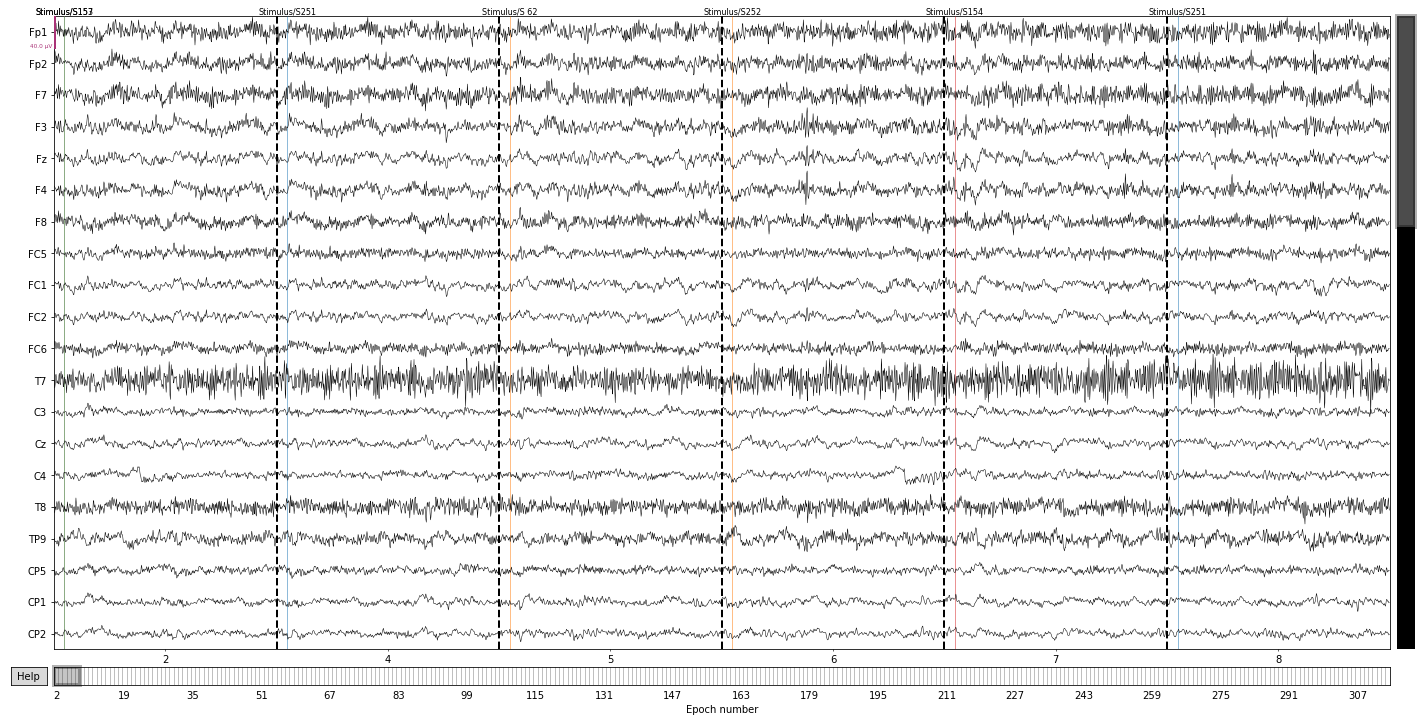

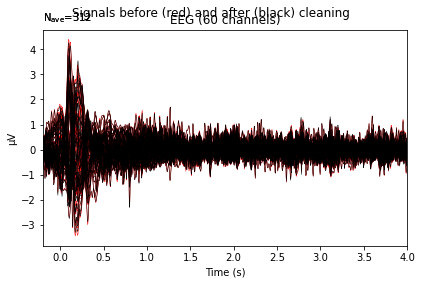

In [39]:
#Resizing plot figure
mne.set_config('MNE_BROWSE_RAW_SIZE','20,10')

#Filtered data after ICA-CAR
fig14 = f_epochs_clean_ica_car.plot(n_epochs=6, events=events_stimulus, event_id=event_stimulus_dict);
fig15 = ica.plot_overlay(f_epochs_clean_ica_car.average());

#save figures
fig14.savefig('outputs_fig/fig14_filtered_signal_data_after_ica_car.png', dpi=600)
fig15.savefig('outputs_fig/fig15_overlay_filtered_signal_data_after_ica_car.png', dpi=600)

#### Selecting channels

In [40]:
#Selecting only the frontal, parietal, and reference lobe channels for eye movement
p_f_data = f_epochs_clean_ica_car.copy().pick_channels(['F1','F2','F3','F4','F5','F6','F7','F8','Fz','P1','P2','P3','P4','P5','P6','P7','P8','Pz'])
p_f_data.info

<Info | 9 non-empty values
 bads: []
 ch_names: F7, F3, Fz, F4, F8, P7, P3, Pz, P4, P8, F5, F1, F2, F6, P5, P1, ...
 chs: 18 EEG
 custom_ref_applied: False
 dig: 64 items (3 Cardinal, 61 EEG)
 highpass: 1.0 Hz
 lowpass: 35.0 Hz
 meas_date: 2015-10-02 15:10:43 UTC
 nchan: 18
 projs: Average EEG reference: on
 sfreq: 250.0 Hz
>

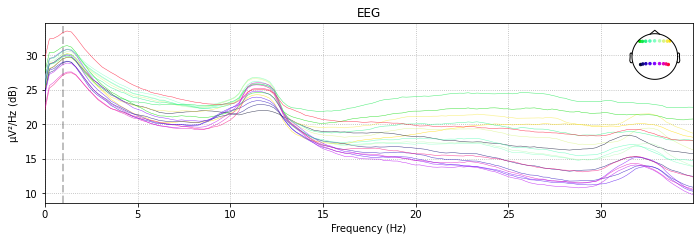

In [41]:
#Plotting filtered data from selected channels
fig16 = p_f_data.plot_psd(fmin=0, fmax=35, spatial_colors=True);

#save figure
fig16.savefig('outputs_fig/fig16_psd_filtered_data_selected_channels.png', dpi=600)

#### Save dataset final

In [42]:
#Datetime of the experiment
meas_date = p_f_data.info['meas_date']

#Dataframe with the events
dt_eeg = p_f_data.to_data_frame()

#Change time column to datetime type
dt_eeg['time'] = pd.to_datetime(dt_eeg['time'], unit='ms')

#Change dataframe index to a time column
dt_eeg.index = dt_eeg.time
dt_eeg.drop(['time'], axis=1, inplace=True)

#To save the dataframe in a .csv file
dt_eeg.to_csv('datasets/' + subject + '_epochs_clean.csv')

dt_eeg

condition  epoch        F7        F3        Fz  \
time                                                                          
1969-12-31 23:59:59.800  Stimulus/S157      2 -0.232643  2.052001  3.438229   
1969-12-31 23:59:59.804  Stimulus/S157      2 -0.645523  0.249877  4.312762   
1969-12-31 23:59:59.808  Stimulus/S157      2  0.278377 -1.272517  4.950932   
1969-12-31 23:59:59.812  Stimulus/S157      2  2.320865 -1.039765  5.546410   
1969-12-31 23:59:59.816  Stimulus/S157      2  4.413165  1.276999  6.130645   
...                                ...    ...       ...       ...       ...   
1970-01-01 00:00:03.984  Stimulus/S251    314 -2.893896  0.303540  0.270506   
1970-01-01 00:00:03.988  Stimulus/S251    314 -0.465622  0.340664 -0.348487   
1970-01-01 00:00:03.992  Stimulus/S251    314  1.271676  1.118487 -0.503253   
1970-01-01 00:00:03.996  Stimulus/S251    314  1.579646  2.083314 -0.168564   
1970-01-01 00:00:04.000  Stimulus/S251    314  0.823438  2.609706  0.471363   

                               F4        F8        P7        P3        Pz  \
time                                                                        
1969-12-31 23:59:59.800  4.108489  0.636272  0.136628 -2.260468 -3.322682   
1969-12-31 23:59:59.804  4.761957  3.658213  0.698262 -2.955239 -5.158190   
1969-12-31 23:59:59.808  4.768002  5.875726 -0.032960 -4.038674 -6.780321   
1969-12-31 23:59:59.812  4.311768  7.384225 -2.285803 -5.440818 -7.752058   
1969-12-31 23:59:59.816  3.583505  8.512007 -5.388643 -6.725042 -7.648262   
...                           ...       ...       ...       ...       ...   
1970-01-01 00:00:03.984  1.460565 -4.436738  0.338154  2.591991  3.347824   
1970-01-01 00:00:03.988  1.040572 -2.319082  1.060189  2.110119  2.399222   
1970-01-01 00:00:03.992 -0.446295  0.350296  1.051374  1.671964  1.874906   
1970-01-01 00:00:03.996 -2.121028  2.554978  0.323594  1.261302  1.550881   
1970-01-01 00:00:04.000 -2.928593  3.636639 -0.655063  0.768332  0.988893   

                               P4        P8        F5        F1        F2  \
time                                                                        
1969-12-31 23:59:59.800 -3.306549 -0.979665  4.120227  2.026055  3.328337   
1969-12-31 23:59:59.804 -4.548802 -0.349811  0.158047  2.097715  4.401661   
1969-12-31 23:59:59.808 -5.119093  0.003482 -3.765770  2.183187  5.420825   
1969-12-31 23:59:59.812 -4.721763 -0.169895 -4.668309  2.726912  6.315563   
1969-12-31 23:59:59.816 -3.434405 -0.734589 -1.239834  3.655191  6.810861   
...                           ...       ...       ...       ...       ...   
1970-01-01 00:00:03.984 -2.148909 -3.884448 -0.709474  1.247491  1.297459   
1970-01-01 00:00:03.988 -2.155555 -5.184668  0.347172 -0.029398  0.292467   
1970-01-01 00:00:03.992 -1.523367 -6.517553  1.923792 -0.698089 -1.035202   
1970-01-01 00:00:03.996 -0.672803 -7.593159  3.077035 -0.700932 -1.814267   
1970-01-01 00:00:04.000 -0.237778 -8.258636  3.216493 -0.354250 -1.466175   

                               F6        P5        P1        P2        P6  
time                                                                       
1969-12-31 23:59:59.800  2.999171 -1.837491 -2.600409 -4.043565 -3.045821  
1969-12-31 23:59:59.804  2.895924 -2.027346 -3.417326 -5.603637 -4.256562  
1969-12-31 23:59:59.808  2.357037 -2.745827 -4.457078 -6.453059 -4.845282  
1969-12-31 23:59:59.812  1.865744 -4.219054 -5.496897 -6.366891 -4.623360  
1969-12-31 23:59:59.816  1.759031 -6.121641 -6.078730 -5.325822 -3.725920  
...                           ...       ...       ...       ...       ...  
1970-01-01 00:00:03.984 -1.977297 -0.501398  2.795229 -0.162260 -3.356439  
1970-01-01 00:00:03.988 -1.294779 -0.249554  2.198044 -0.734616 -3.125843  
1970-01-01 00:00:03.992 -1.105163 -0.236095  1.884733 -0.626135 -2.335484  
1970-01-01 00:00:03.996 -0.982129 -0.510233  1.717239 -0.135930 -1.309367  
1970-01-01 00:00:04.000 -0.419770 -0.938096  1.379551  0.144544 -0.589506  

[327912 